In [ ]:
pip install spotipy

In [ ]:
import spotipy
import spotipy.util as util
import pandas as pd
import tkinter as tk
from tkinter import filedialog
from spotipy.oauth2 import SpotifyClientCredentials 
from google.colab import files 
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn import metrics 
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
cid = "1e588e09ce624e9e89f73728b17e6332"
secret = "7293cb3b74e343348ad936ba4ec34b07"
username = "Spotify"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
playlists = sp.user_playlists(username, limit=1)
playlist_ids = []
playlist_names = []
for playlist in playlists['items']:
  playlist_ids.append(playlist.get('id'))
  playlist_names.append(playlist.get('name'))

In [ ]:
for cat in sp.categories().get('categories').get('items'):
  print(cat['id'])

toplists
at_home
pop
mood
decades
hiphop
in_the_car
gaming
wellness
workout
chill
focus
sleep
party
metal
rock
edm_dance
dinner
jazz
rnb


In [ ]:
categories = ['hiphop', 'wellness', 'edm_dance', 'jazz', 'country', 'metal', 'chill']
#categories = ['hiphop', 'wellness', 'jazz', 'country', 'metal', 'pop', 'workout', 'chill', 'edm_dance']
#playlist_ids = {'Get Turnt':'37i9dQZF1DWY4xHQp97fN6', '37i9dQZF1DX9uKNf5jGX6m', '37i9dQZF1DXa41CMuUARjl', '37i9dQZF1DX0SM0LYsmbMT', '37i9dQZF1DXdgnLr18vPvu', '37i9dQZF1DWXIcbzpLauPS', '37i9dQZF1DX4WYpdgoIcn6'}
#playlist_index = [0,1,2,3,4,5,6]
#playlist_ids = {'Get Turnt': '37i9dQZF1DWY4xHQp97fN6', 'Yoga & Meditation': '37i9dQZF1DX9uKNf5jGX6m', 'Friday Cratediggers': '37i9dQZF1DXa41CMuUARjl', 'Jazz Vibes': '37i9dQZF1DX0SM0LYsmbMT', 'Tailgate Party': '37i9dQZF1DXdgnLr18vPvu', 'New Core': '37i9dQZF1DWXIcbzpLauPS', 'Chill Hits': '37i9dQZF1DX4WYpdgoIcn6'}
#playlist_index = {'Get Turnt': 0, 'Yoga & Meditation': 1, 'Friday Cratediggers': 2, 'Jazz Vibes': 3, 'Tailgate Party': 4, 'New Core': 5, 'Chill Hits': 6}
playlist_ids = {}
playlist_index = {}
idx = 0
for category in categories:
  for playlist_info in (sp.category_playlists(category_id=category, country='US', limit=10).get('playlists').get('items')):
    if len(sp.user_playlist_tracks('Spotify', playlist_info.get('id'), limit=100)['items']) == 100:
      playlist_ids[playlist_info.get('name')] = playlist_info.get('id')
      playlist_index[playlist_info.get('name')] = idx
      idx += 1
      break 

print(playlist_ids)
print(playlist_index)

NameError: ignored

In [ ]:
def gather_data(creator, playlist_ids, playlist_index):

  track_features_list = ['duration_ms', 'acousticness', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']
  columns_list = []
  columns_list.extend(track_features_list)
  columns_list.append('output')
  tracks_df = pd.DataFrame(columns = columns_list)
  tracks_df_training = pd.DataFrame(columns = columns_list)
  tracks_df_validation = pd.DataFrame(columns = columns_list)
  audio_features = {}

  for playlist_name in playlist_ids.keys():
  #for playlist_name in ['Get Turnt']:
    dataset_index = 0
    playlist_id = playlist_ids[playlist_name]
    output_val = playlist_index[playlist_name]
    albums = sp.playlist_tracks(playlist_id, limit=100)
    cnt = 0
    for i in range(0, len(albums['items'])):
      if albums['items'][i]['track'] != None:
        cnt += 1
    for i in range(0, len(albums['items'])):
      if albums['items'][i]['track'] != None:
        audio_info = sp.audio_features(albums['items'][i]['track']['id'])[0]
        for feature in track_features_list:
          audio_features[feature] = audio_info.get(feature)
          audio_features['output'] = output_val
        if (i <= (cnt*0.8)):
          tracks_df_training = tracks_df_training.append(audio_features, ignore_index=True)
        else:
          tracks_df_validation = tracks_df_validation.append(audio_features, ignore_index=True)
        tracks_df = tracks_df.append(audio_features, ignore_index=True)
          
    '''
    for track in tracks:
      audio_info = sp.audio_features(tracks['track']['id'])[0]
    '''
  return tracks_df, tracks_df_training, tracks_df_validation


In [ ]:
#df,df_training, df_validation = gather_data('Spotify', playlist_ids, playlist_index)
#df.drop_duplicates(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo'], inplace=True)

KeyboardInterrupt: ignored

In [ ]:
#df.to_csv('spotify_data.csv')
#df_training.to_csv('spotify_training_data.csv')
#df_validation.to_csv('spotify_validation_data.csv')
#files.download('spotify_data.csv')
#files.download('spotify_training_data.csv')#
#files.download('spotify_validation_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
training_data_path = '/content/drive/Shared drives/CS229_Final_Project/spotify_training_data.csv'
validation_data_path = '/content/drive/Shared drives/CS229_Final_Project/spotify_validation_data.csv'
data_path = '/content/drive/Shared drives/CS229_Final_Project/spotify_data.csv'
df_training = pd.read_csv(training_data_path)
df_validation = pd.read_csv(validation_data_path)
df = pd.read_csv(data_path)
#print(df_training)
#print(df_validation)

In [ ]:
#K Nearest Neighbors 
def knn_select_features(num_features, train_data, test_data, n):
  features = SelectKBest(k=num_features)
  features.fit(train_data.loc[:, train_data.columns != 'output'], train_data['output'])
  cols = list(train_data.columns[features.get_support(1)])
  kn = knn(n_neighbors=n, weights='distance')
  kn.fit(train_data[cols], train_data['output'])
  train_predictions = kn.predict(train_data[cols])
  predictions = kn.predict(test_data[cols])
  return(train_predictions, predictions)


In [ ]:
def find_accuracy(predictions, test_output):
  acc = 0;
  for i, prediction in enumerate(predictions):
    acc += (prediction == test_output[i])
  return (acc/len(predictions))

['energy']
0.45112781954887216
['energy', 'loudness']
0.5488721804511278
['energy', 'loudness', 'instrumentalness']
0.6390977443609023
['danceability', 'energy', 'loudness', 'instrumentalness']
0.7368421052631579
['acousticness', 'danceability', 'energy', 'loudness', 'instrumentalness']
0.7293233082706767
['acousticness', 'danceability', 'energy', 'loudness', 'instrumentalness', 'valence']
0.7142857142857143
['acousticness', 'danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'valence']
0.7368421052631579
['duration_ms', 'acousticness', 'danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'valence']
0.2631578947368421
['duration_ms', 'acousticness', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'instrumentalness', 'valence']
0.2631578947368421
['duration_ms', 'acousticness', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'instrumentalness', 'valence', 'tempo']
0.2556390977443609
['duration_ms', 'acousticness', 'dance

Text(0, 0.5, 'accuracy')

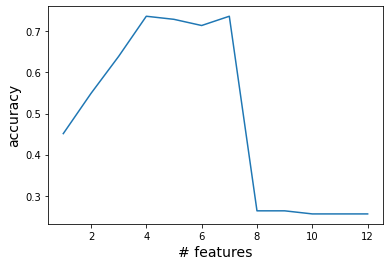

In [ ]:
key = ['duration_ms', 'acousticness', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'output']
accuracies = []
train_accuracies = []
num_features = len(key)-1
for i in range(1,num_features+1):
  train_pred, pred = (knn_select_features(i, df_training[key], df_validation[key],7))
  acc = find_accuracy(pred, df_validation['output'])
  train_acc = find_accuracy(train_pred, df_training['output'])
  print(acc)
  accuracies.append(acc)
  train_accuracies.append(train_acc)
print(accuracies)
x = np.linspace(1, num_features , num_features)
fig = plt.figure()
plt.plot(x, accuracies, '-')
plt.xlabel('# features', fontsize=14)
plt.ylabel('accuracy', fontsize=14)

In [ ]:
# Logistic regression 
def logreg(features, train_data, test_data):
  clf = LogisticRegressionCV(multi_class='ovr', max_iter=5000)
  clf.fit(train_data[features], train_data['output'])
  plot_confusion_matrix(clf, test_data[features], test_data['output'])
  save_path = 'logreg_confusion.jpg'
  plt.savefig(save_path)
  plt.show()
  files.download(save_path)
  predictions = clf.predict(test_data[features])
  return(predictions) 


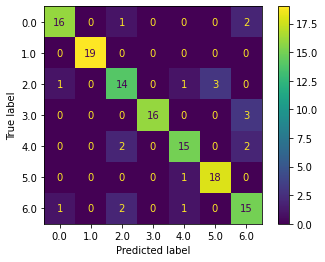

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.849624060150376


In [ ]:
best_track_features = ['acousticness', 'danceability', 'energy', 'speechiness', 'instrumentalness', 'valence']
pred = logreg(best_track_features, df_training, df_validation)
print(find_accuracy(pred, df_validation['output']))

In [ ]:
# Naive Bayes Classifier 
def naive_bayes(features, train_data, test_data):
  alpha = [0.1, 1, 10, 50]
  random_grid = {'alpha': alpha}

  clf = MultinomialNB()
  clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid, cv=3)
  clf_random.fit(train_data[features], train_data['output'])
  print(clf_random.best_params_)

  clf = MultinomialNB(alpha=clf_random.best_params_['alpha']).fit(train_data[features], train_data['output'])
  print(clf.score(test_data[features], test_data['output']))
  plot_confusion_matrix(clf, test_data[features], test_data['output'])
  save_path = 'naive_bayes_confusion.jpg'
  plt.savefig(save_path)
  plt.show()
  files.download(save_path)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'alpha': 0.1}
0.7669172932330827


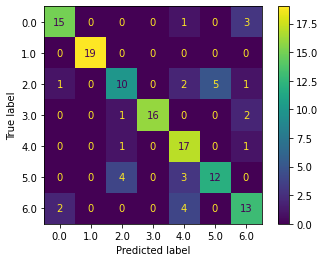

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn import preprocessing 
best_track_features = ['acousticness', 'danceability', 'energy', 'speechiness', 'instrumentalness', 'valence']

naive_bayes(best_track_features, df_training, df_validation)
#print(find_accuracy(pred, df_validation['output']))

In [ ]:
# Random forest classifier 
def random_forest(features, train_data, test_data):
  # hyperparameter tuning for random forest classifier 
  n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
  max_features = ['auto', 'sqrt']
  max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
  max_depth.append(None)
  min_samples_split = [2, 5, 10]
  min_samples_leaf = [1, 2, 4]
  bootstrap = [True, False]
  random_grid = {'n_estimators': n_estimators, 
                 'max_features': max_features, 
                 'max_depth': max_depth, 
                 'min_samples_split': min_samples_split, 
                 'bootstrap': bootstrap}

  rf = RandomForestClassifier()
  rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3)
  rf_random.fit(train_data[features], train_data['output'])

  clf = RandomForestClassifier(n_estimators=rf_random.best_params_['n_estimators'], 
                               max_features=rf_random.best_params_['max_features'],
                               max_depth=rf_random.best_params_['max_depth'], 
                               min_samples_split=rf_random.best_params_['min_samples_split'], 
                               bootstrap=rf_random.best_params_['bootstrap'])
  clf.fit(train_data[features], train_data['output'])
  predictions = clf.predict(test_data[features])
  return (predictions) 


In [ ]:
pred = random_forest(best_track_features, df_training, df_validation)
print(find_accuracy(pred, df_validation['output']))

KeyboardInterrupt: ignored

In [ ]:
# Hyperparameter tuning for random forest classifier 
def hyperparameter_tuning_random_forest(features, train_data):
  # Number of trees in random forest
  n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)]
  # Number of features to consider at every split
  max_features = ['auto', 'sqrt']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  max_depth.append(None)
  # Minimum number of samples required to split a node
  min_samples_split = [2, 5, 10]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [1, 2, 4]
  # Method of selecting samples for training each tree
  bootstrap = [True, False]
  random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

  # Use the random grid to search for best hyperparameters
  # First create the base model to tune
  rf = RandomForestClassifier()
  # Random search of parameters, using 3 fold cross validation, 100 different combinations
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3)
  # Fit the random search model
  rf_random.fit(train_data[features], train_data['output'])
  print(rf_random.best_params_)


In [ ]:
hyperparameter_tuning_random_forest(best_track_features, df_training)

{'n_estimators': 277, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}


0.8646616541353384


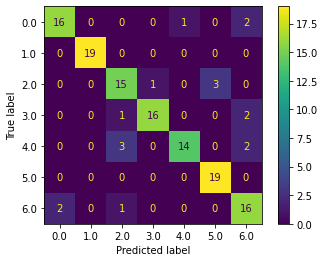

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
clf = RandomForestClassifier(n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth = 80, bootstrap='True')
clf.fit(df_training[best_track_features], df_training['output'])
predictions = clf.predict(df_validation[best_track_features])
print(find_accuracy(predictions, df_validation['output']))
plot_confusion_matrix(clf, df_validation[best_track_features], df_validation['output'])
save_path = 'rf_confusion.jpg'
plt.savefig(save_path)
plt.show()
files.download(save_path)

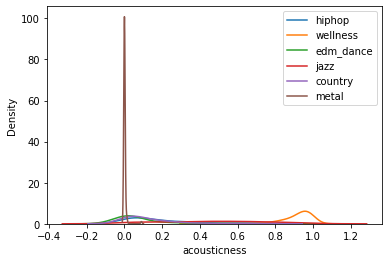

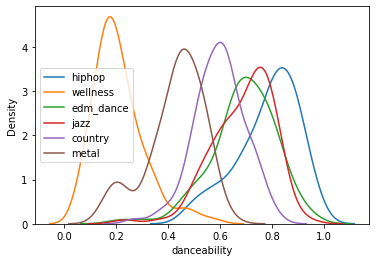

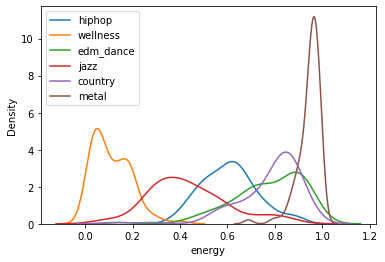

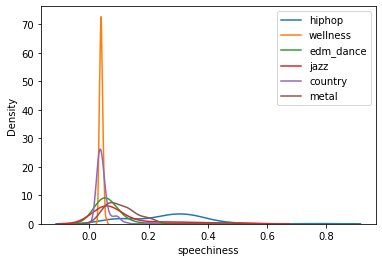

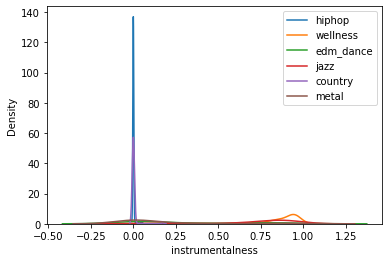

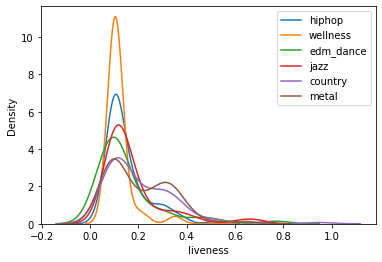

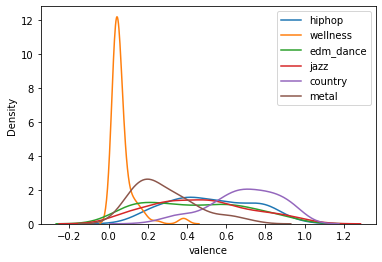

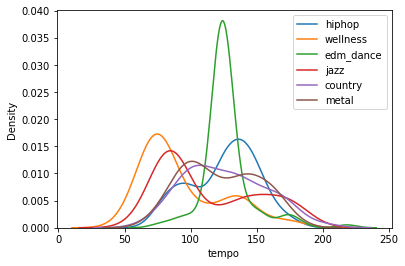

In [ ]:
# plotting distribution of features for the playlists 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
categories = ['hiphop', 'wellness', 'edm_dance', 'jazz', 'country', 'metal', 'chill']
#playlist_names = list(playlist_ids.keys())
track_features_list = ['acousticness', 'danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']
cnt = 0
for feature in track_features_list:
  cnt += 1
  for i in range(0, 6):
    playlist = df.loc[df['output'] == i]
    sns.distplot(playlist[feature], hist=False, label=categories[i])
  plt.legend()
  save_path = 'feature_{}.jpg'.format(cnt)
  #plt.savefig(save_path)
  plt.show()
  #files.download(save_path)

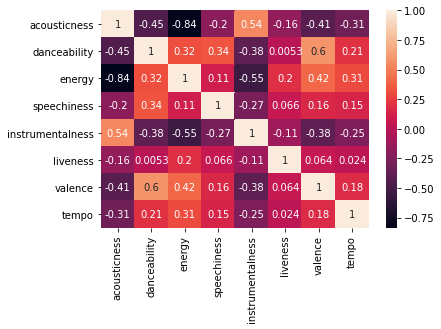

In [ ]:
# Correlation matrix 

import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = df[track_features_list].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [ ]:
# SVM classifier with hyperparameter tuning 
def hyperparameter_tuning_SVM(features, train_data, validation_data):
  gamma = [0.1, 1, 5, 10, 50]
  C = [0.1, 1, 5, 10, 50]
  random_grid = {'gamma': gamma, 'C': C}

  rbf = SVC(kernel='rbf')
  rbf_random = RandomizedSearchCV(estimator=rbf, param_distributions=random_grid, n_iter=25, cv=3)
  rbf_random.fit(train_data[features], train_data['output'])
  print(rbf_random.best_params_)
  rbf = SVC(kernel='rbf', gamma=rbf_random.best_params_['gamma'], C=rbf_random.best_params_['C'])
  rbf.fit(train_data[features], train_data['output'])
  print(rbf.score(validation_data[features], validation_data['output']))
  plot_confusion_matrix(rbf, validation_data[features], validation_data['output'])
  save_path = 'rbf_confusion.jpg'
  plt.savefig(save_path)
  plt.show()
  files.download(save_path)


  linear = SVC(kernel='linear')
  linear_random = RandomizedSearchCV(estimator=linear, param_distributions=random_grid, n_iter=25, cv=3)
  linear_random.fit(train_data[features], train_data['output'])
  print(linear_random.best_params_)
  linear = SVC(kernel='linear', gamma=linear_random.best_params_['gamma'], C=linear_random.best_params_['C']).fit(train_data[features], train_data['output'])
  print(linear.score(validation_data[features], validation_data['output']))
  plot_confusion_matrix(linear, validation_data[features], validation_data['output'])
  save_path = 'linear_confusion.jpg'
  plt.savefig(save_path)
  plt.show()
  files.download(save_path)

  degree = [3, 5, 7, 9]
  random_grid_poly = {'degree': degree, 'C': C}
  poly = SVC(kernel='poly')
  poly_random = RandomizedSearchCV(estimator=poly, param_distributions=random_grid_poly, n_iter=20, cv=3)
  poly_random.fit(train_data[features], train_data['output'])
  print(poly_random.best_params_)
  poly = SVC(kernel='poly', degree=poly_random.best_params_['degree'], C=poly_random.best_params_['C']).fit(train_data[features], train_data['output'])
  print(poly.score(validation_data[features], validation_data['output']))
  plot_confusion_matrix(poly, validation_data[features], validation_data['output'])
  save_path = 'poly_confusion.jpg'
  plt.savefig(save_path)
  plt.show()
  files.download(save_path)

{'gamma': 0.1, 'C': 50}
0.8421052631578947


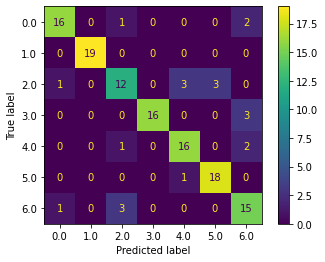

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'gamma': 0.1, 'C': 5}
0.8345864661654135


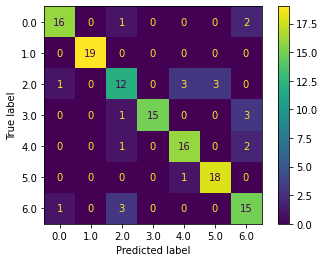

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'degree': 3, 'C': 0.1}
0.8195488721804511


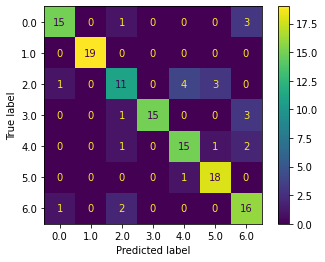

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
hyperparameter_tuning_SVM(best_track_features, df_training, df_validation)

In [ ]:
#Perceptron NN
from sklearn.neural_network import MLPClassifier
def MLP(train_data, test_data):
  pnn = MLPClassifier(solver='lbfgs', alpha=1e-2,
                    hidden_layer_sizes=(5,), random_state=1)
  pnn.fit(train_data[track_features_list], train_data['output'])
  predictions = pnn.predict(test_data[track_features_list])
  return (predictions)

In [ ]:
pnn_pred = MLP(df_training, df_validation)
print(find_accuracy(pnn_pred, df_validation['output']))

0.14285714285714285


In [ ]:
# K means with hyperparameter tuning
def hyperparameter_tuning_knn(features, train_data, validation_data):
  n_neighbors = [3, 5, 7, 9, 11]
  random_grid = {'n_neighbors': n_neighbors}

  kn = knn(weights='distance')
  kn_random = GridSearchCV(estimator=kn, param_grid=random_grid, cv=3)
  kn_random.fit(train_data[features], train_data['output'])
  print(kn_random.best_params_)
  kn = knn(n_neighbors=kn_random.best_params_['n_neighbors'], weights='distance')
  kn.fit(train_data[features], train_data['output'])
  print(kn.score(validation_data[features], validation_data['output']))
  plot_confusion_matrix(kn, validation_data[features], validation_data['output'])
  save_path = 'knn_confusion.jpg'
  plt.savefig(save_path)
  plt.show()
  files.download(save_path)

{'n_neighbors': 9}
0.7894736842105263


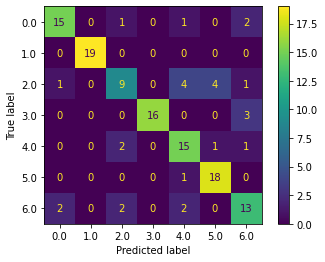

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
hyperparameter_tuning_knn(best_track_features, df_training, df_validation)